<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('/datasets/query_1.csv')
df2 = pd.read_csv('/datasets/query_3.csv')

Прочитаем наш файл

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
df1.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
df2.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Наблюдаем, что проблем с данными нет.

Выберем топ-10 городов по количеству рейсов.

In [7]:
df2_sorted = df2.sort_values(by = 'average_flights', axis=0, ascending=False)

In [8]:
display(df2_sorted.head(10))

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Построим графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.

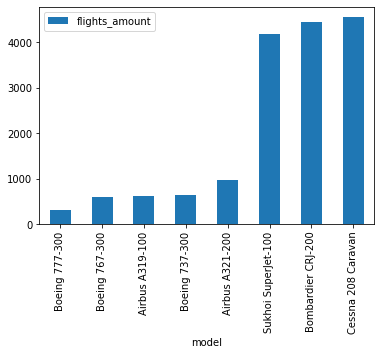

In [9]:
models_and_flights = df1.sort_values("flights_amount")
models_and_flights.plot(x="model", y="flights_amount", kind="bar")
 

Видим, что преимущественно на самолётах моделей Bombardier CRJ-200,Cessna 208 Caravan и Sukhoi SuperJet-100 летает больше всего - потому что огромные "Боинги" и "Аирбасы" летают в аэропорты-хабы,где происходит смена самолёта и его дозаправка откуда в более маленькие города вылетают уже маленькие самолёты.Поэтому,  в аутсайдерах находятся самолёты фирм "Боинг" и "Аирбас".

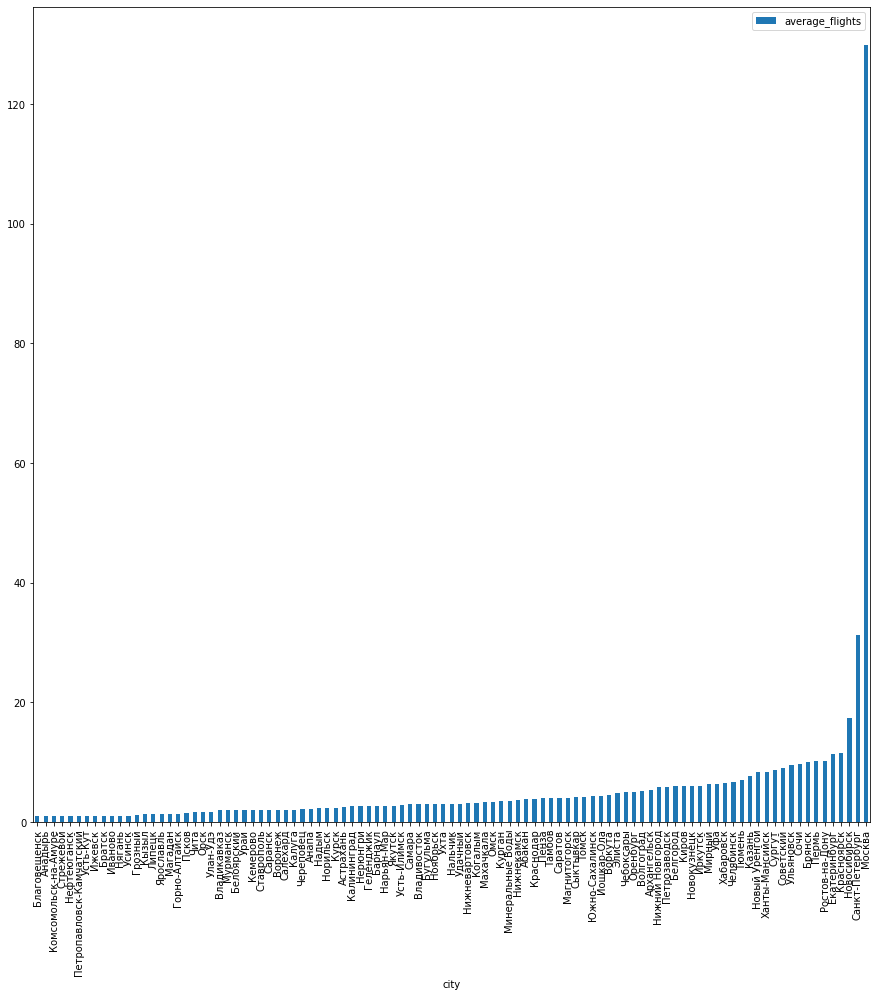

In [12]:
cities_and_flights = df2.sort_values("average_flights")
cities_and_flights.plot(x="city", y="average_flights", kind="bar",figsize=(15,15))

Москва и Санкт-Петербург лидируют по количеству полётов.

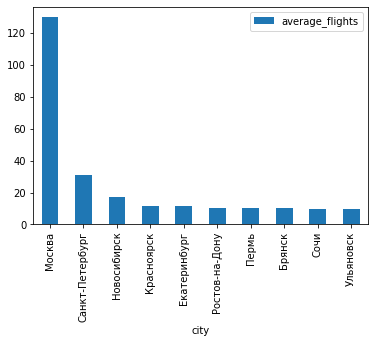

In [11]:
top10_and_flights = df2_sorted.head(10)
top10_and_flights.plot(x="city", y="average_flights", kind="bar")

Наблюдаем картину из топ-10 городов с самым большим количеством полётов. 2-е место сильно отличается от 1-го, далее различия не столь значительные. Видим, что есть зависимость между количеством жителей, проживающих в данных городах, и количеством рейсов. Далее идут города-миллионники, или города-курорты(как, например, Красноярск или Сочи). Такой разброс между Москвой и Санкт-Петербургом так же объясняется тем, что Москва является топ городом для пересадки с любого дальнего города, например, с Европы нужно попасть в Сибирь, то пересадка будет в Москве.

## Итоговый вывод

Была получена информация с базы данных и проанализирован спрос пассажиров на рейсы в города, где проимходят крупнейшие культурные фестивали. Была предпринята попытка понять предпочтения пользователей, полкупающих блитеы на разные направления. 

Топ-3 городов - Москва, Санкт-Петербург, Новосибирск. Москва - часто является городом для пересадки, Санкт-Петербург - просто большой и красивый город, северная столица РФ, Новосибирск - главный транзитный пересадочный пункт для сибири и прочей той части России, оттуда уже идёт маленький самолёт или поезд. Или для дозаправки.

Были выявлены три самых популярных самолёта - Bombardier CRJ-200,Cessna 208 Caravan и Sukhoi SuperJet-100. Ввиду логистики в РФ

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод